In [1]:
import pandas as pd
import names
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import random
from pyqubo import Constraint, Array
import neal
from dwave.system import LeapHybridSampler
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import sqlite3
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.rcParams["figure.figsize"] = (25,8)

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv("soa_2020_2030.csv")
df.loc[df.Nations != 'Rarita', 'Salary'] = df.loc[df.Nations != 'Rarita']['Salary']*1.1
df.loc[df.Nations == 'Rarita', 'Salary'] = df.loc[df.Nations == 'Rarita']['Salary']*0.9
df.loc[df.Nations == 'Rarita', 'adjust_ovr'] = df.loc[df.Nations == 'Rarita']['adjust_ovr']*1.1

df_no_rar = df[df.Nations != 'Rarita']

In [3]:
sell_2022 = df[(df.Year==2022)&(df.adjust_ovr > df['adjust_ovr'].mean())&(df.Nations == 'Rarita')&(df.Age > 33)]['Player'].to_list()

df.loc[df.Player.isin(sell_2022), 'Nations'] = random.choices(list(df_no_rar.Nations.unique()), k=1)[0]
df.loc[df.Player.isin(sell_2022), 'Salary'] = df.loc[df.Player.isin(sell_2022)]['Salary']*1.1

In [241]:
def get_team(df, year, num_sims, salary, max_ovr, min_ovr, max_age):
    
    gks = [ 'GK', 'GKMF', ]
    
    df_year = df[(df.Year == year)&(df.Salary > 0)&(df.adjust_ovr < max_ovr)&(df.adjust_ovr > min_ovr)&(df.Age < max_age)]
    
    df_trim = df_year[['Player', 'adjust_ovr', 'Salary', 'Nations', 'Age', 'Positions', 'Leagues']]

    player_dict = df_trim.set_index('Player').to_dict('index')
    
    df_year_gk = df_year[df_year.Positions.isin(gks)]
    
    df_year_no_gk = df_year[~df_year.Positions.isin(gks)]
    
    players_to_choose = list(df_year_no_gk['Player'].unique())
    gk_to_choose = list(df_year_gk['Player'].unique())
    
    sals = []
    ovrs = []
    teams = []

    for i in range(num_sims):

        players = random.choices(players_to_choose, k=14)
        gk = random.choices(gk_to_choose, k=1)

        players = list(np.unique(players))
        gk = list(np.unique(gk))
        
        sal = 0
        ovr = 0
        team = []
        
        players_tot = players + gk
        
        for k in players_tot:
                
            sal += player_dict[k]['Salary']
            ovr += player_dict[k]['adjust_ovr']
            team.append(k)

            
        if (sal > salary):
                
            pass
            
        else:
                
            teams.append(team)
            sals.append(sal)
            ovrs.append(ovr/18)
            
            
            break
        
    return teams, sals, ovrs

In [11]:
def get_lineup(df, year, num_sims, salary, max_ovr, min_ovr, max_age):
    
    x,y,z = get_team(df, year, num_sims, salary, max_ovr, min_ovr, max_age)
    
    try:
        index = z.index(max(z))
    
        print('Overall')
        print(z[index])
        print('Salary')
        print(y[index])

        lineup = df[df.Player.isin(x[index])&(df.Year==year)]
        
    except:
        print('No solution found')
        
    return lineup

In [6]:
df = df.drop_duplicates(['Player', 'Year'])

In [331]:
lineup_22 = get_lineup(df, 2022, 10000000, 200000000,45, 10, 50)

Overall
20.39657483507797
Salary
188329399.5


In [332]:
lineup_221 = get_lineup(df, 2022, 10000000, 400000000,45, 10, 50)

Overall
26.878602812735398
Salary
314153516.6


In [333]:
lineup_222 = get_lineup(df, 2022, 10000000, 500000000,55, 20, 50)

Overall
40.69199929428425
Salary
431898498.90000004


In [334]:
lineup_223 = get_lineup(df, 2022, 10000000, 600000000,65, 20, 50)

Overall
42.27646245683886
Salary
578988960.0


In [335]:
lineup_224 = get_lineup(df, 2022, 10000000, 700000000,75, 30, 50)

Overall
41.516249986659105
Salary
603661163.6


In [336]:
lineup_22 = get_lineup(df, 2022, 10000000, 800000000,85, 30, 50)

Overall
42.833710019561295
Salary
757691371.8000001


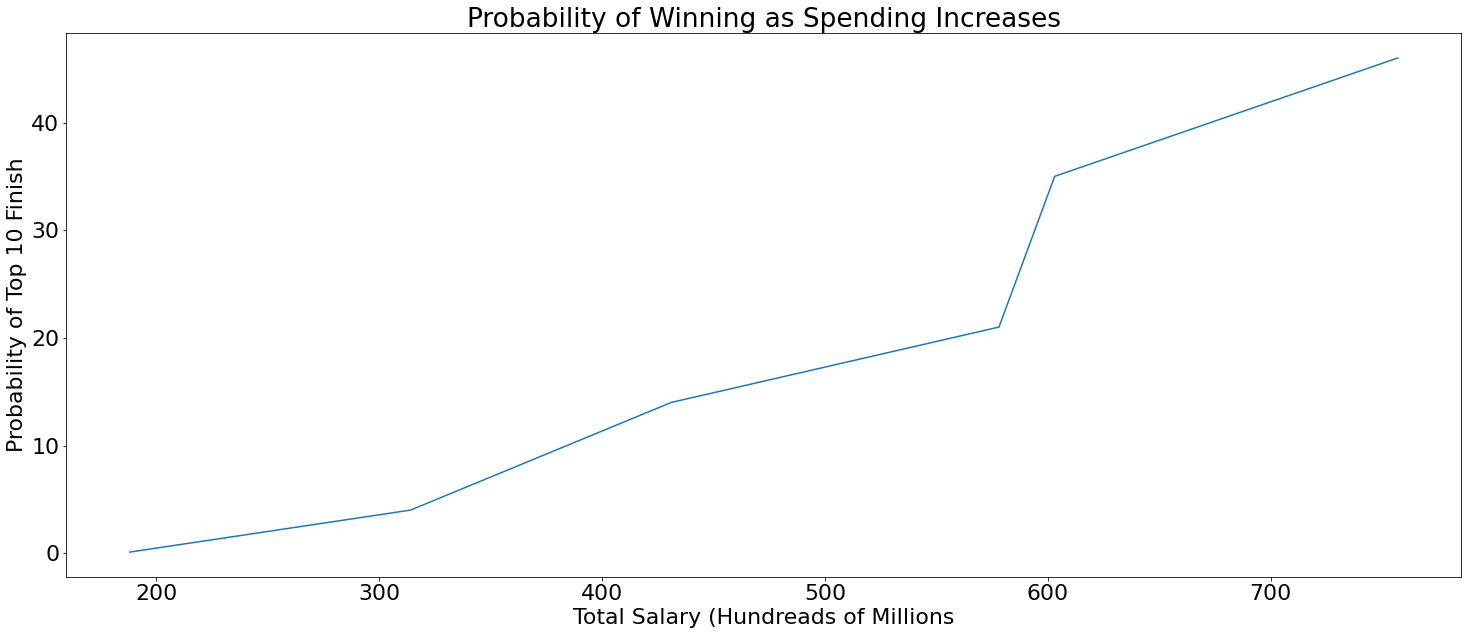

In [343]:
plt.plot([188, 314, 431, 578, 603, 757],[0.1, 4, 14, 21, 35, 46])
plt.title('Probability of Winning as Spending Increases')
plt.xlabel('Total Salary (Hundreads of Millions')
plt.ylabel('Probability of Top 10 Finish')
plt.show()

# 2023

In [35]:
lineup_23 = get_lineup(df, 2023, 10000000, 280000000,50, 20, 50)

Overall
40.6697039003161
Salary
251531499.84600002


# 2024

In [49]:
lineup_24 = get_lineup(df, 2024, 10000000, 450000000,65, 35, 50)

Overall
47.97415898677309
Salary
355891372.30200005


In [50]:
lineup_25 = get_lineup(df, 2025, 10000000, 450000000,65, 35, 50)

Overall
48.906000249369235
Salary
423952959.0180001


In [56]:
lineup_26 = get_lineup(df, 2026, 10000000, 500000000,70, 40, 35)

Overall
49.214736443899014
Salary
458624631.94200015


In [78]:
lineup_27 = get_lineup(df, 2027, 10000000, 300000000,45, 20, 50)

Overall
18.400033180280218
Salary
268095749.196


In [205]:
lineup_28 = get_lineup(df, 2028, 10000, 1500000000,100, 74, 50)

Overall
69.05339110064202
Salary
1476312569.6880002


In [253]:
df[(df.Year == 2029)&(df.Nations == 'Rarita')&(df.Age > 38)]['Salary'].sum()

678144746.1060001

In [255]:
lineup_29 = get_lineup(df, 2029, 100000, 600000000,45, 10, 50)

Overall
23.913212253195027
Salary
561215903.6


In [256]:
lineup_30 = get_lineup(df, 2030, 10000000, 600000000,45, 10, 50)

Overall
25.49137853936236
Salary
521490801.9420001


In [257]:
lineup_31 = get_lineup(df, 2031, 10000000, 700000000,50, 55, 50)

Overall
35.71339328709427
Salary
654192911.6940001


In [281]:
rarita_players_22 = df[df.Player.isin(lineup_22.Player.to_list())].Player.to_list()

def get_trim_roster(df_roster, team):
    
    gk = ['GK', 'GKMF',  'MFGK']

    test = df_roster[df_roster.Nations == team].drop_duplicates('Player', keep='last')

    
    gks = test[test.Positions.isin(gk)].sort_values('adjust_ovr', ascending = False).head(2)
    
    test = test.sort_values('adjust_ovr', ascending = False).head(18)
    
    test = pd.concat([test, gks], axis=0)
    
    if (len(test) < 18)|(len(gks) < 1):
        pass
    
    else:
        test = test.head(18)
        
        
        return test

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2022)&(~df_no_rar.Player.isin(rarita_players_22))], i)
    df_roster = pd.concat([df_roster,df_team])

In [282]:
team_ratings_22 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings_22 = team_ratings_22.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings_22.loc[-1] = ['Rarita', 22.145670519276297]
team_ratings_22 = team_ratings_22.reset_index(drop = True)

# 2023

In [283]:
rarita_players_23 = lineup_23.Player.to_list()

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2023)&(~df_no_rar.Player.isin(rarita_players_23))], i)
    df_roster = pd.concat([df_roster,df_team])
    
team_ratings23 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings23 = team_ratings23.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings23.loc[-1] = ['Rarita', 40.6697039003161]
team_ratings23 = team_ratings23.reset_index(drop = True)


# 2024

In [284]:
rarita_players_24 = lineup_24.Player.to_list()

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2024)&(~df_no_rar.Player.isin(rarita_players_24))], i)
    df_roster = pd.concat([df_roster,df_team])
    
team_ratings24 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings24 = team_ratings24.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings24.loc[-1] = ['Rarita', 47.97415898677309]
team_ratings24 = team_ratings24.reset_index(drop = True)

# 2025

In [285]:
rarita_players_25 = lineup_25.Player.to_list()

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2025)&(~df_no_rar.Player.isin(rarita_players_25))], i)
    df_roster = pd.concat([df_roster,df_team])
    
team_ratings25 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings25 = team_ratings25.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings25.loc[-1] = ['Rarita', 48.906000249369235]
team_ratings25 = team_ratings25.reset_index(drop = True)

In [286]:
rarita_players_26 = lineup_26.Player.to_list()

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2026)&(~df_no_rar.Player.isin(rarita_players_26))], i)
    df_roster = pd.concat([df_roster,df_team])
    
team_ratings26 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings26 = team_ratings26.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings26.loc[-1] = ['Rarita', 49.214736443899014]
team_ratings26 = team_ratings26.reset_index(drop = True)

In [287]:
rarita_players_27 = lineup_27.Player.to_list()

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2027)&(~df_no_rar.Player.isin(rarita_players_27))], i)
    df_roster = pd.concat([df_roster,df_team])
    
team_ratings27 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings27 = team_ratings27.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings27.loc[-1] = ['Rarita',18.400033180280218]
team_ratings27 = team_ratings27.reset_index(drop = True)

In [303]:
rarita_players_28 = lineup_28.Player.to_list()

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2028)&(~df_no_rar.Player.isin(rarita_players_28))], i)
    df_roster = pd.concat([df_roster,df_team])
    
team_ratings28 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings28 = team_ratings28.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings28.loc[-1] = ['Rarita', 69.05339110064202]
team_ratings28 = team_ratings28.reset_index(drop = True)

In [289]:
rarita_players_29 = lineup_29.Player.to_list()

df_roster = pd.DataFrame()

for i in df_no_rar.Nations.unique():
    df_team = get_trim_roster(df_no_rar[(df_no_rar.Year == 2029)&(~df_no_rar.Player.isin(rarita_players_29))], i)
    df_roster = pd.concat([df_roster,df_team])
    
team_ratings29 = df_roster.groupby('Nations')['adjust_ovr'].mean().reset_index()

team_ratings29 = team_ratings29.sort_values(by = 'adjust_ovr', ascending=False).head(23)
team_ratings29.loc[-1] = ['Rarita', 25.49137853936236]
team_ratings29 = team_ratings29.reset_index(drop = True)

# Monte Carlo Projections

In [305]:
def game_simulate(d, team1, team2):
    
    if np.random.uniform(0) < 0.3:
        return 1

    elif np.random.normal(d[team1], 15) > np.random.normal(d[team2], 15) :
        return 3

    else:
        return 0 

def game_simulate_elim(d, team1, team2):

    if np.random.normal(d[team1], 15) > np.random.normal(d[team2], 15) :
        return 3

    else:
        return 0 
    

In [291]:
def get_round_result(d,group1):

    res = {}

    for t in group1:
        res[t] = []

    for i in group1:
        for j in group1:
            if i != j:
                result = game_simulate(d, i,j)
                res[i].append(result)
                
                if result ==3:
                    res[j].append(0)
                elif result == 1:
                    
                    res[j].append(1)
                else:
                    res[j].append(3)
                
    res = pd.DataFrame(res).sum().reset_index()
    res.columns = ['Nations', 'Pts']
                
    return res

def get_round_elim(d, group1):

    res = {}

    for t in group1:
        res[t] = []


    result = game_simulate_elim(d, group1[0],group1[1])
    res[group1[0]].append(result)
    
    if result ==3:
        res[group1[1]].append(0)

    else:
        res[group1[1]].append(3)
                     
    res = pd.DataFrame(res).sum().reset_index()
    res.columns = ['Nations', 'Pts']
                
    return res


    
    

In [292]:
def sim_tourn(team_ratings):
    d = team_ratings.set_index('Nations')['adjust_ovr'].to_dict()
    all_teams = team_ratings.Nations.to_list()

    random.shuffle(all_teams)

    group1 = all_teams[0:6]
    group2 = all_teams[6:12]
    group3 = all_teams[12:18]
    group4 = all_teams[18:24]

    res1 = get_round_result(d, group1).sort_values('Pts', ascending=False)
    res2 = get_round_result(d, group2).sort_values('Pts', ascending=False)
    res3 = get_round_result(d, group3).sort_values('Pts', ascending=False)
    res4 = get_round_result(d, group4).sort_values('Pts', ascending=False)

    round1 = pd.concat([res1, res2, res3, res4], axis=0)

    res5 = get_round_elim(d, [res1.head(1)['Nations'].values[0], res4.head(1)['Nations'].values[0]]).sort_values('Pts', ascending=False)
    res6 = get_round_elim(d, [res2.head(1)['Nations'].values[0], res3.head(1)['Nations'].values[0]]).sort_values('Pts', ascending=False)

    round2 = pd.concat([round1, res5, res6], axis=0)

    finals = get_round_elim(d, [res5.head(1)['Nations'].values[0], res6.head(1)['Nations'].values[0]]).sort_values('Pts', ascending=False)

    result = pd.concat([finals, round2], axis=0)
    
    result = result.groupby('Nations')['Pts'].sum().reset_index()
    
    result = result.sort_values('Pts', ascending=False).reset_index(drop = True)
    
    result['ranking'] = result.index + 1

    return result


In [293]:
def get_rarita_ranks(team_ratings, num_sims):
    
    rs = []
    
    for i in range(num_sims):
        
        df = sim_tourn(team_ratings)
        
        try:
        
            ranks = df[df.Nations == 'Rarita']['ranking'].values[0]
            rs.append(ranks)
            
        except:
            pass
        
    return rs

In [294]:
def get_probs(team_ratings, num_sims):
    ranks = get_rarita_ranks(team_ratings, num_sims)
    
    plt.hist(ranks)
    plt.show()
    
    cnts = Counter(ranks)
    
    df = pd.DataFrame(cnts, index = [1]).T.reset_index()
    df.columns = ['ranking', 'num_occ']
    
    
    tot_sims = df['num_occ'].sum()
    print('Probability to Win Championship')
    r1 = df[df.ranking == 1]['num_occ'].sum()/tot_sims
    print(str(r1*100)+'%')
    r10 = df[df.ranking <= 10]['num_occ'].sum()/tot_sims
    print('Probability to rank inside the Top 10')
    print(str(r10*100)+'%')
    

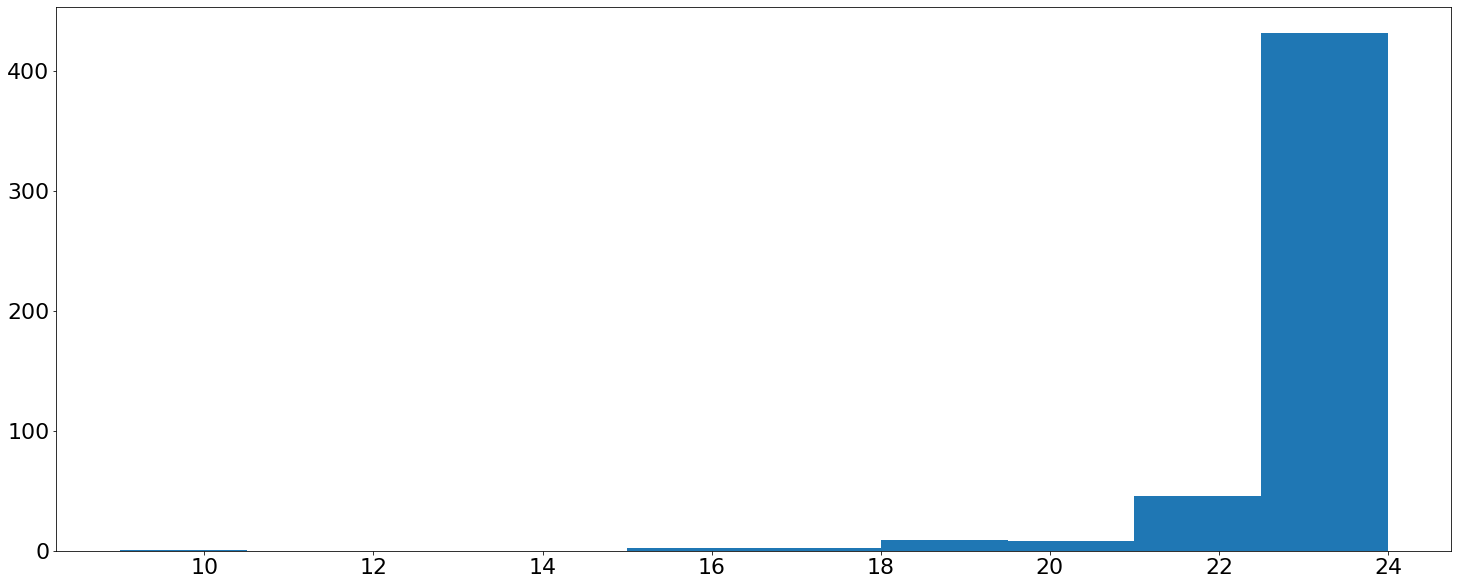

Probability to Win Championship
0.0%
Probability to rank inside the Top 10
0.2%


In [306]:
get_probs(team_ratings_22, 500)

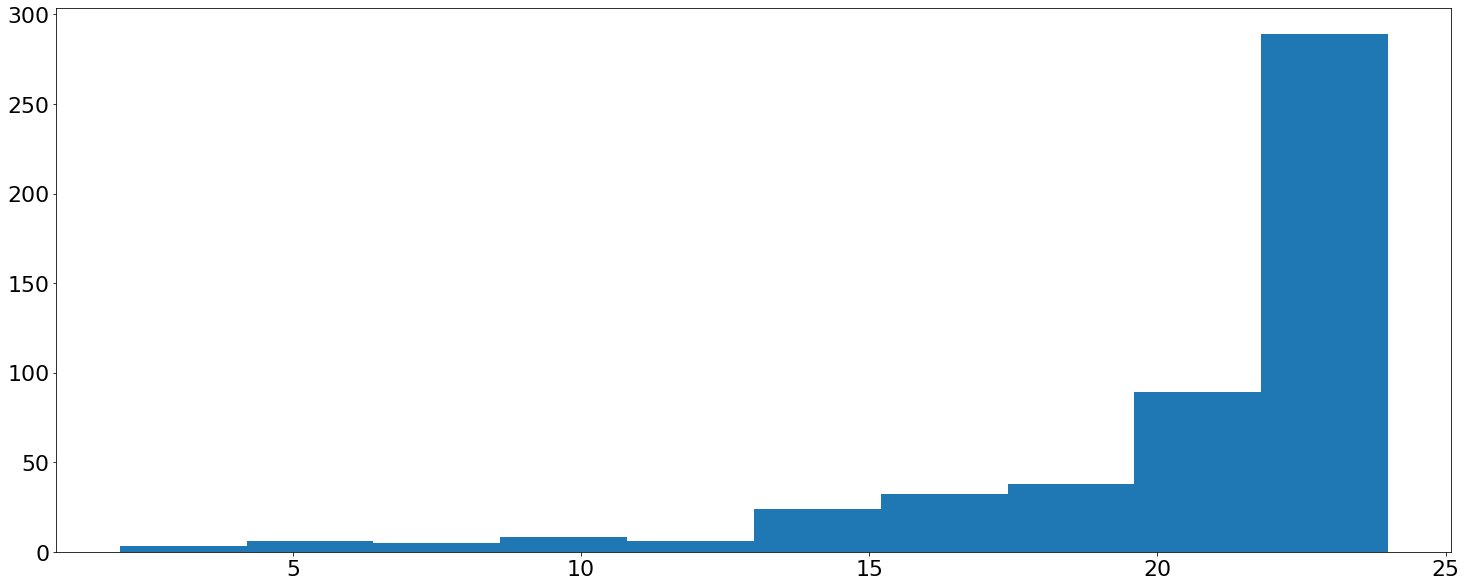

Probability to Win Championship
0.0%
Probability to rank inside the Top 10
4.3999999999999995%


In [307]:
get_probs(team_ratings23, 500)

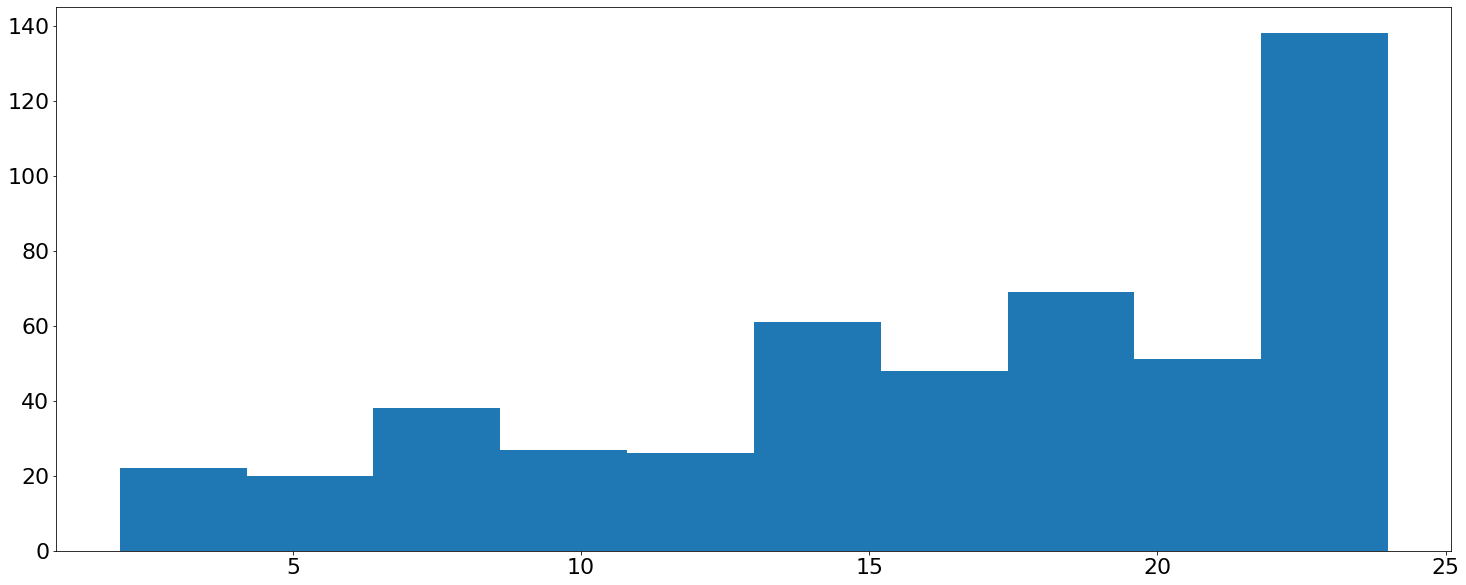

Probability to Win Championship
0.0%
Probability to rank inside the Top 10
21.4%


In [308]:
get_probs(team_ratings24, 500)

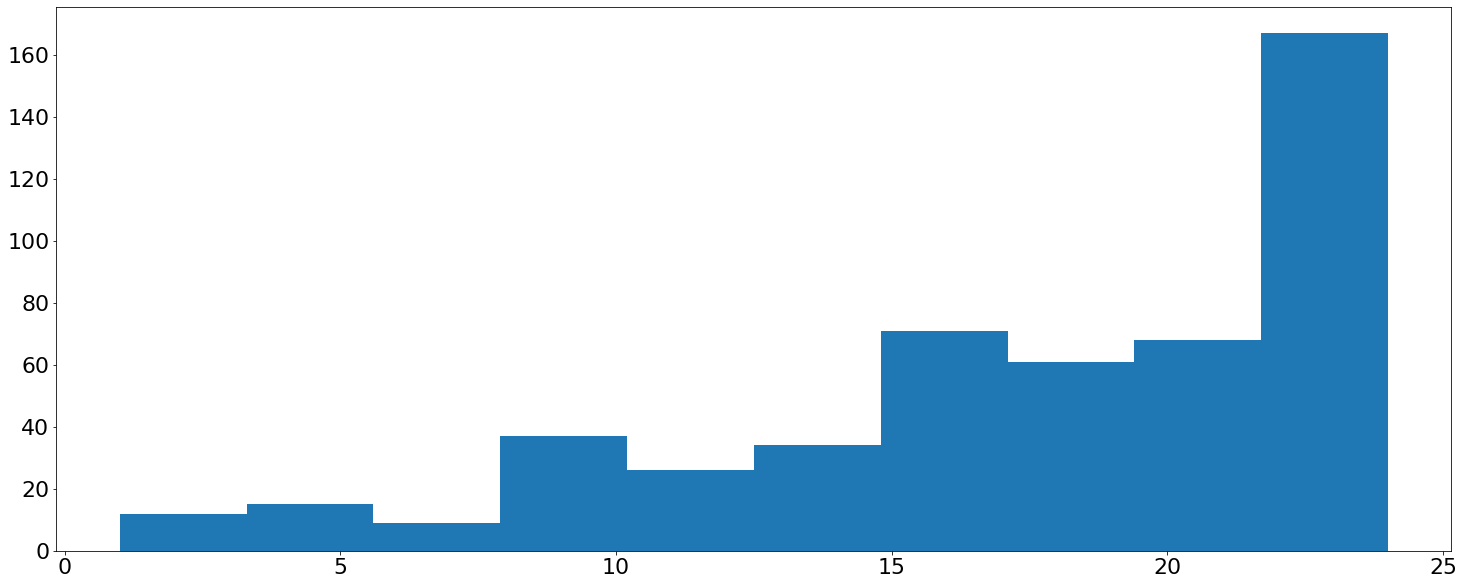

Probability to Win Championship
0.2%
Probability to rank inside the Top 10
14.6%


In [309]:
get_probs(team_ratings25, 500)

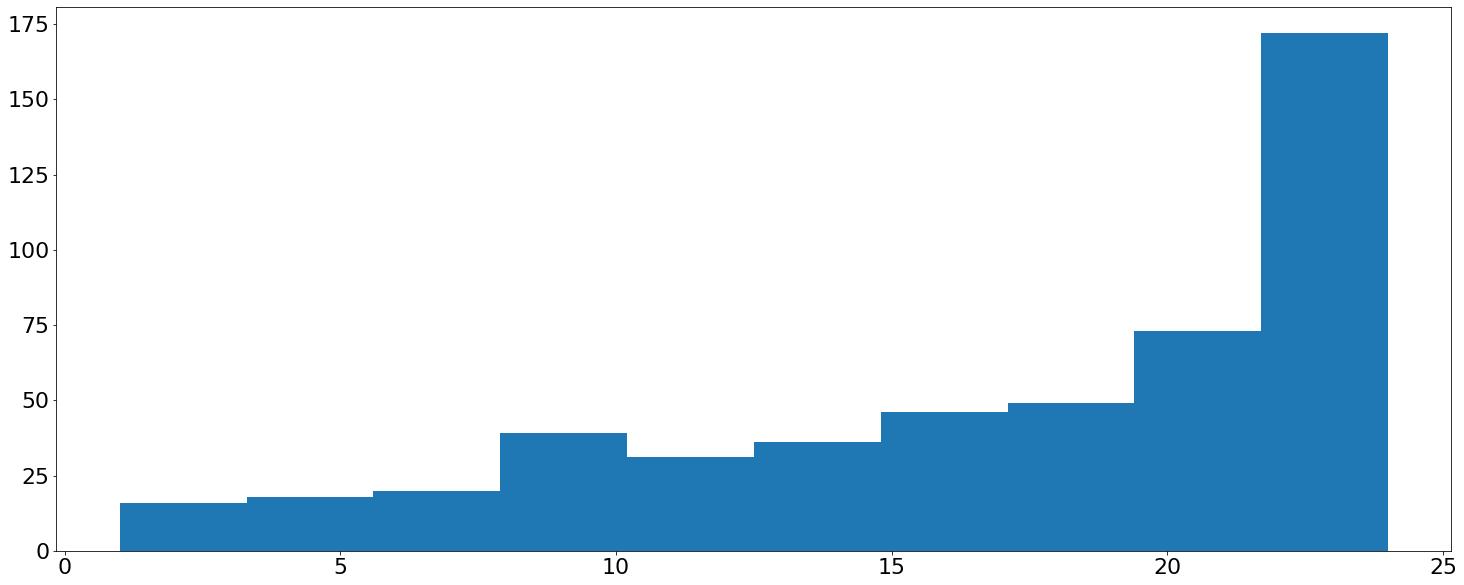

Probability to Win Championship
1.2%
Probability to rank inside the Top 10
18.6%


In [310]:
get_probs(team_ratings26, 500)

In [311]:
team_ratings25.sort_values(by = 'adjust_ovr', ascending = False)

,Nations,adjust_ovr
0,Sobianitedrucy,66.079054
1,Nganion,61.630505
2,Esia,58.554725
3,Manlisgamncent,58.266414
4,Byasier Pujan,57.434276
5,Bernepamar,57.318870
6,Dosqaly,57.277469
7,Eastern Sleboube,57.137508
8,Leoneku Guidisia,56.652904
9,Nkasland Cronestan,56.395319


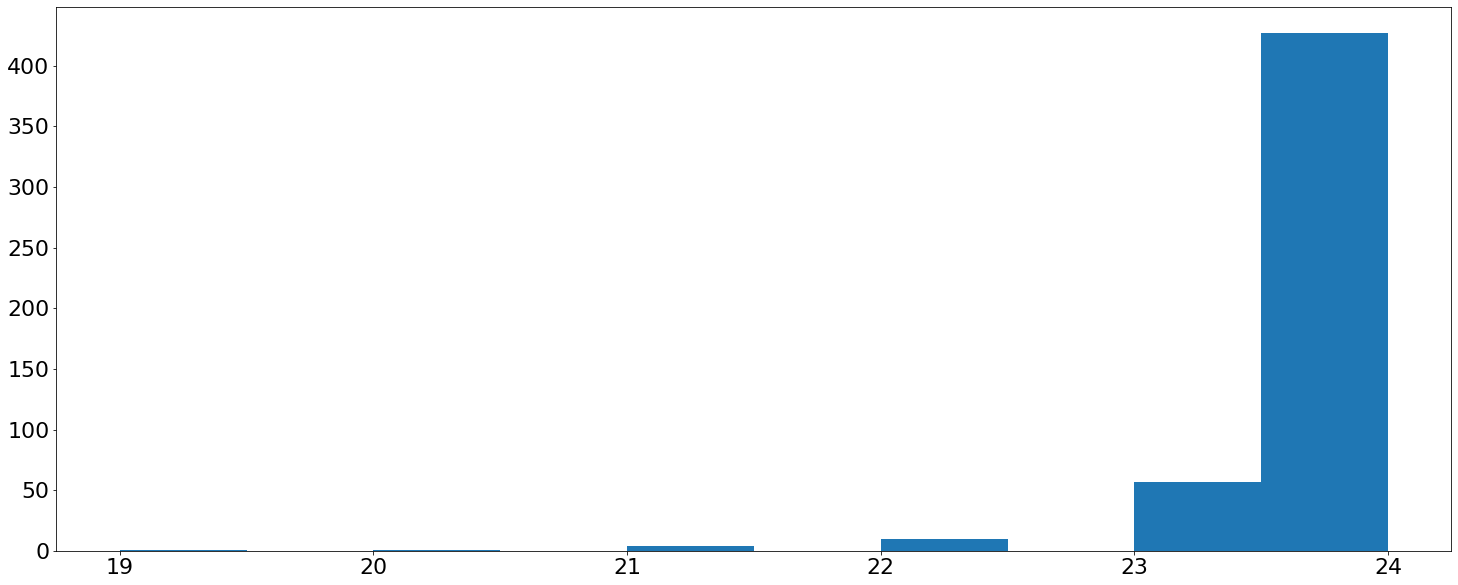

Probability to Win Championship
0.0%
Probability to rank inside the Top 10
0.0%


In [312]:
get_probs(team_ratings27, 500)

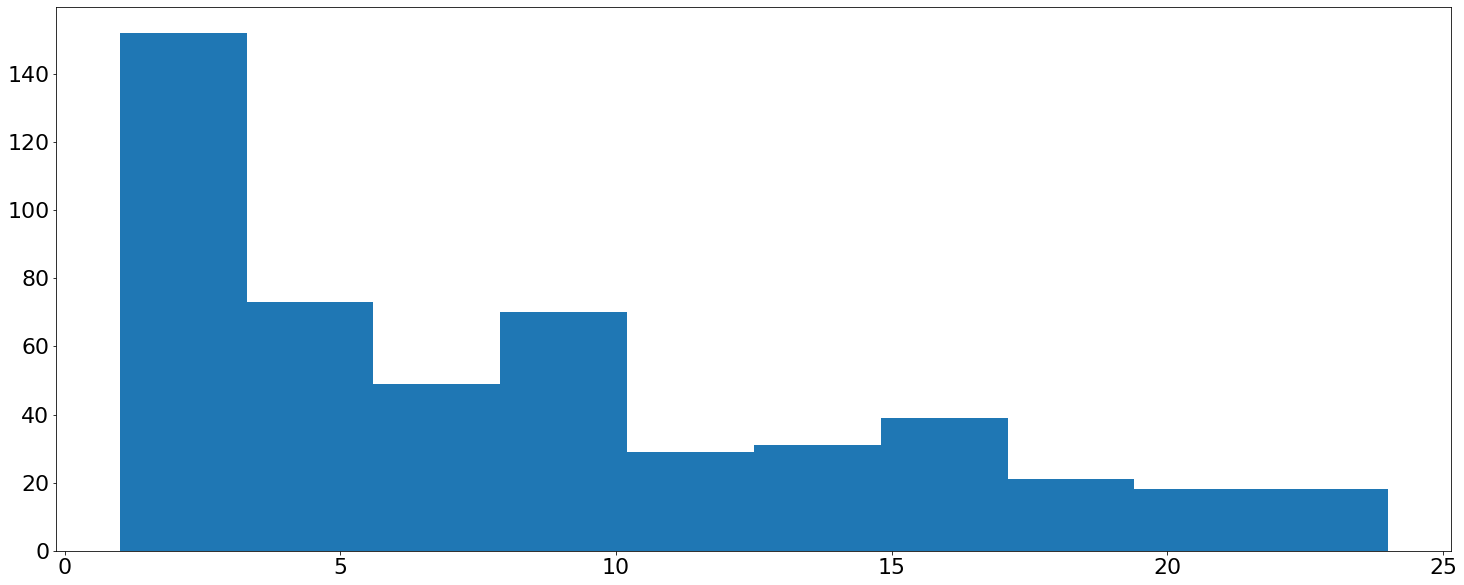

Probability to Win Championship
13.8%
Probability to rank inside the Top 10
68.8%


In [313]:
get_probs(team_ratings28, 500)

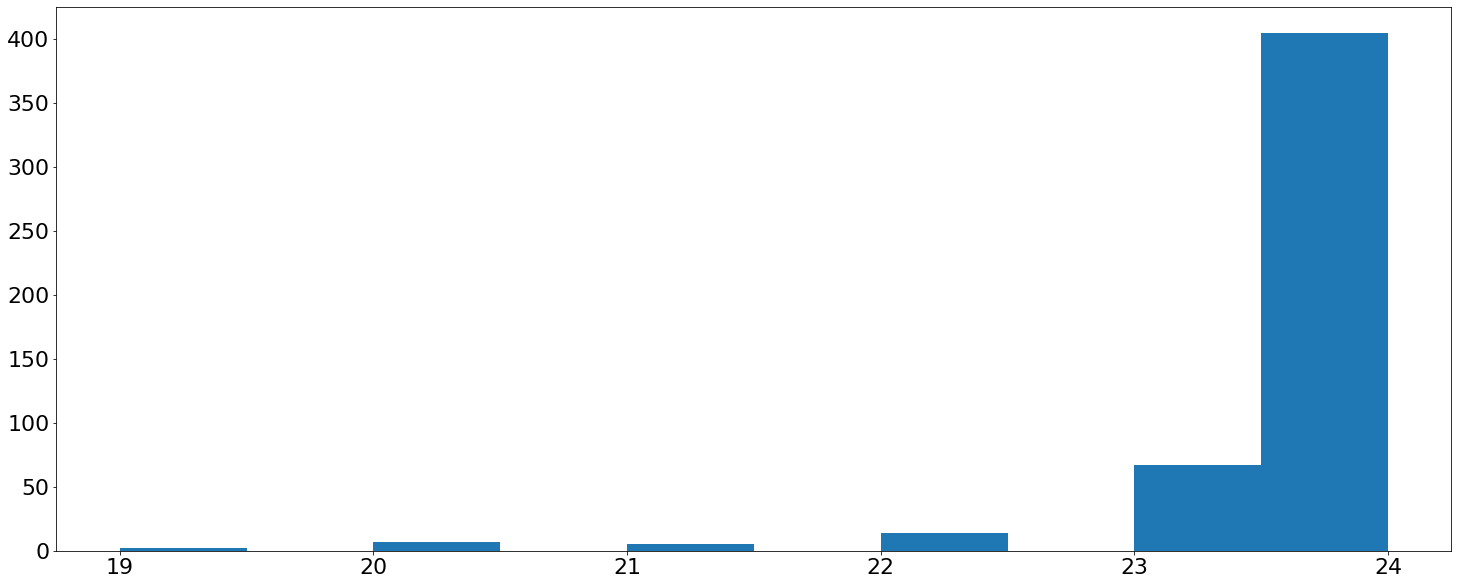

Probability to Win Championship
0.0%
Probability to rank inside the Top 10
0.0%


In [314]:
get_probs(team_ratings29, 500)

In [315]:
lineup_22

,Unnamed: 0,Player,Nations,Salary,Squads,Positions,Leagues,Age,time,goals,...,err,d1,sv,w,d,churn,Year,eff,adjust_ovr,test
6573,75,ANamataka,Dosqaly,11636680.0,Mean Colts,DF,B,21,0.097200,0.108000,...,0.054000,0.032400,0.000000,0.000000,0.000000,0.0,2022,0.100372,33.688630,5.676603
6794,297,CLeroy,People's Land of Maneau,9258040.0,Silver Heels,GK,A,28,0.975200,0.000000,...,-0.009200,-0.092000,55.172400,0.984400,0.046000,0.0,2022,0.210342,38.194973,5.817975
7004,508,EBecker,Central Namemo Laand,36822280.0,Simple Privateers,MFDF,B,19,0.950400,0.097200,...,0.075600,-0.086400,0.000000,0.000000,0.000000,0.0,2022,0.106498,39.970905,5.873690
7245,749,GChee,Deshslands Landdenhai,10050920.0,Awkward Trailblazers,FW,C,21,0.105000,-0.063000,...,0.052500,0.052500,0.000000,0.000000,0.000000,0.0,2022,-0.081435,37.292900,5.789675
7805,1310,KNakazzi,Dosqaly,30479240.0,Unethical Comets,MF,B,19,0.210000,0.094500,...,20.968500,-0.073500,0.000000,0.000000,0.000000,0.0,2022,0.154142,39.969398,5.873642
8708,2213,UKaahwa,People's Land of Maneau,16860360.0,Green Fleet,DF,A,18,-0.054000,0.043200,...,-0.043200,-0.054000,0.000000,0.000000,0.000000,0.0,2022,0.074792,40.965285,5.904885
8857,2363,WDufour,Nganion,17373400.0,Hideous Spiders,FW,E,22,0.504000,-0.042000,...,2.068500,-0.010500,0.000000,0.000000,0.000000,0.0,2022,-0.032621,44.918090,6.028892
9044,2550,YMutema,Nganion,2798400.0,Flawless Cows,FW,B,28,0.380000,-0.040000,...,-0.050000,0.050000,0.000000,0.000000,0.000000,0.0,2022,-0.097436,44.263192,6.008347
9388,21,EricWolfe,Eastern Niasland,17564820.9,Tournament,FWMF,Tournament,21,-8.487838,-0.341817,...,3.187716,0.079930,31.975941,-0.124037,-0.101765,0.0,2022,-0.041960,44.150889,6.004823
9459,93,BernardCruz,Eastern Niasland,38937808.8,Tournament,DFFW,Tournament,21,8.212384,-0.385920,...,2.312703,0.012188,26.896190,0.030844,-0.079472,0.0,2022,-0.193405,35.207808,5.724262


In [319]:
team_ratings27.sort_values(by = 'adjust_ovr', ascending = False)

,Nations,adjust_ovr
0,Sobianitedrucy,69.717123
1,Dosqaly,68.263445
2,Nganion,67.003031
3,Byasier Pujan,65.105226
4,Eastern Sleboube,63.636993
5,Esia,63.408755
6,Leoneku Guidisia,62.882165
7,Nkasland Cronestan,62.733334
8,Bernepamar,62.620220
9,Ngoque Blicri,62.156817
